In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def non_func(x):
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    return y

In [3]:
def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

In [4]:
x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

In [97]:
# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)

In [98]:
np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

In [75]:
MSE_test

0.7039057376630612

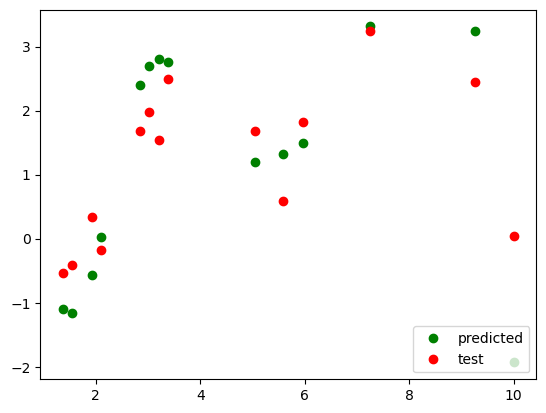

In [70]:
plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)

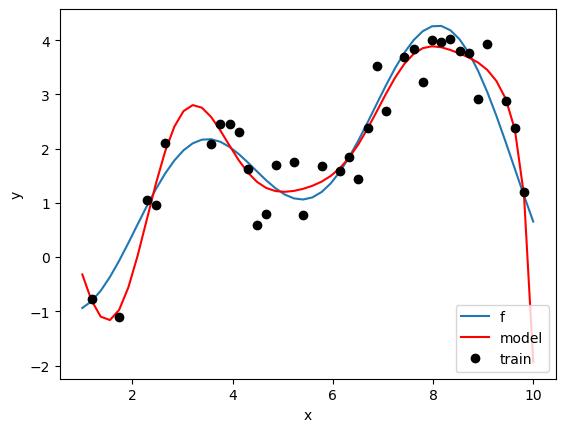

In [71]:
#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)

In [53]:
ytrain_p = linearModel.predict(xtrain)

In [81]:
MSEtrain = 0
for i in range(0, xtrain.shape[0]):
    MSEtrain += (ytrain[i][0]-ytrain_p[i][0])**2

MSEtrain /= xtrain.shape[0]
MSEtrain

0.19556471929763772

In [82]:
MSEtest = 0
for i in range(0, ytest.shape[0]):
    MSEtest += (ytest[i][0]-ytest_p[i][0])**2
MSEtest /= xtest.shape[0]
MSEtest

0.7039057376630612

In [83]:
poly2 = PolynomialFeatures(degree=2)
xnew2 = poly2.fit_transform(x)

poly6 = PolynomialFeatures(degree=6)
xnew6 = poly6.fit_transform(x)

In [86]:
np.random.seed(12)
indeksi = np.random.permutation(len(xnew2))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew2)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew2)))+1:len(xnew2)]

xtrain = xnew2[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew2[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel2 = lm.LinearRegression()
linearModel2.fit(xtrain,ytrain)

ytest_p = linearModel2.predict(xtest)

In [90]:
np.random.seed(12)
indeksi = np.random.permutation(len(xnew6))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew6)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew6)))+1:len(xnew6)]

xtrain = xnew6[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew6[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel6 = lm.LinearRegression()
linearModel6.fit(xtrain,ytrain)

ytest_p = linearModel6.predict(xtest)

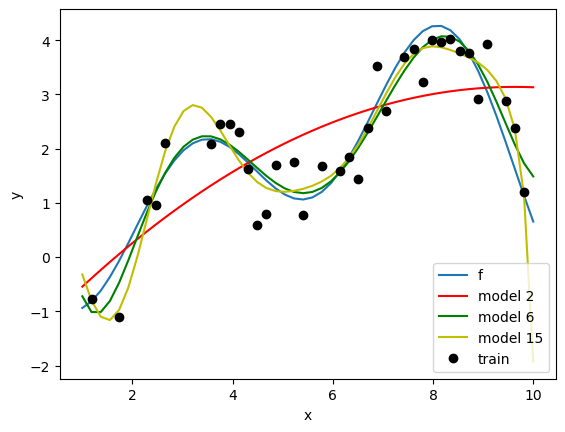

In [94]:
#pozadinska funkcija vs model
plt.figure(3)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel2.predict(xnew2),'r-',label='model 2')
plt.plot(x, linearModel6.predict(xnew6),'g-',label='model 6')
plt.plot(x, linearModel.predict(xnew),'y-',label='model 15')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)

In [121]:
ridgeModel = lm.Ridge(1)
ridgeModel.fit(xtrain, ytrain)

Ridge(alpha=1)

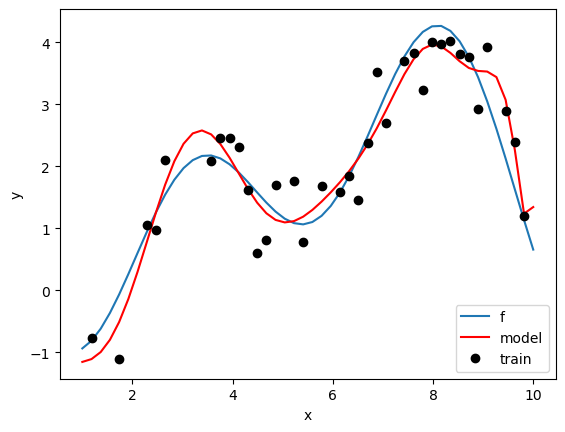

In [122]:
#pozadinska funkcija vs model
plt.figure(4)
plt.plot(x,y_true,label='f')
plt.plot(x, ridgeModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)